# Keras를 활용한 심층 신경망 실습 - mnist 손글씨 숫자 분류

In [1]:
#!pip install tensoflow

In [1]:
import tensorflow as tf
tf.__version__

'2.9.0'

### 순차 심층 신경망 모델 구현
1. 6만개의 이미지로 이루어진 X_train을 심층 신경망 모델에 넣어서 y_train 데이터의 숫자로 인식하도록 학습
2. 노드의 활성화 함수, 학습을 위한 최적화 함수, 손실함수, 측정 방법 설정
3. 학습을 마친 모델에 1만개의 이미지로 이루어진 X_test를 입력하여 정확도 측정

#### 데이터 준비: 분할, 차원변경, 정규화

In [2]:
# 데이터 파일 가져오기
import numpy as np
X_train_np = np.loadtxt('./data/skyggle_MNIST/X_train.txt')
y_train_np = np.loadtxt('./data/skyggle_MNIST/y_train.txt').astype(int)
X_test_np = np.loadtxt('./data/skyggle_MNIST/X_test.txt')

In [ ]:
import pandas as pd

# X_train = pd.read_csv('./data/skyggle_MNIST/X_train.txt')
# X_train.shape

In [ ]:
X_train_np.shape, y_train_np.shape, X_test_np.shape

((60000, 784), (60000,), (10000, 784))

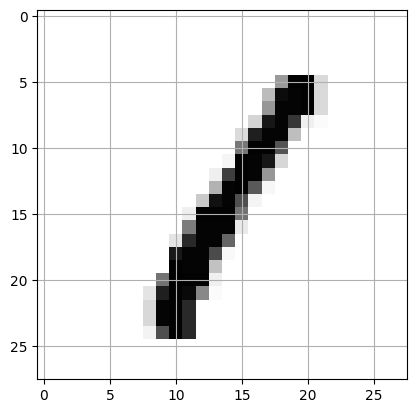

In [ ]:
# 불러온 이미지 데이터를 시각화해보기
import matplotlib.pyplot as plt
plt.imshow(X_train_np[3].reshape(28, 28), cmap='Greys') # 원래 값 'grey', 반전 'Greys'
plt.grid()

In [3]:
y_train_np[:10].astype(int)

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

In [ ]:
# 타겟 분포 확인
pd.Series(y_train_np).value_counts().sort_index()

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
dtype: int64

In [4]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_np, y_train_np, stratify=y_train_np, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(48000, 784)

In [5]:
# 데이터 정규화
X_train = X_train / 255
X_val = X_val / 255

In [6]:
# y_train, y_val 를 원핫인코딩(카테고리 화)
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)

print(y_train[:10])
print(y_train_encoded[:10])

[1 3 6 8 6 8 5 7 8 0]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


#### 인공 신경망 모델 구성

In [7]:
# 1) 모델 및 레이어 구성
from keras.models import Sequential
from keras.layers import Flatten # input_shape이 2차원 이상인 경우 Flatten을 사용해야 함. 이번 실습에서는 input_shape이 (784, ), 1차원이므로 사용하지 않음 
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=20, activation='relu', input_shape=(784,)))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=10, activation='softmax', name='out_layer'))

In [8]:
# 2) 모델 요약
model.summary() # Param # -> (연결 강도, 가중치) 수

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                                 
 out_layer (Dense)           (None, 10)                160       
                                                                 
Total params: 16,175
Trainable params: 16,175
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 3) 모델 시각화
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, to_file='MNIST.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


#### 최적화 알고리즘과 손실함수 지정: 모형의 학습 과정 설정

In [10]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

#### 모델 훈련

In [11]:
hist = model.fit(X_train, y_train_encoded, epochs=10, validation_data=(X_val, y_val_encoded))

Epoch 1/10
1500/1500 [==============================] - 3s 1ms/step - loss: 0.4655 - accuracy: 0.8666 - val_loss: 0.2837 - val_accuracy: 0.9165
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2420 - accuracy: 0.9300 - val_loss: 0.2290 - val_accuracy: 0.9343
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2006 - accuracy: 0.9401 - val_loss: 0.2011 - val_accuracy: 0.9408
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1758 - accuracy: 0.9479 - val_loss: 0.1858 - val_accuracy: 0.9456
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1584 - accuracy: 0.9524 - val_loss: 0.1807 - val_accuracy: 0.9476
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1486 - accuracy: 0.9556 - val_loss: 0.1723 - val_accuracy: 0.9488
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1371 - accuracy: 0.9590 - val_loss: 0.1648 - val_accuracy:

In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [15]:
import pandas as pd
df = pd.DataFrame(hist.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.465496,0.866583,0.283697,0.916500
1,0.241987,0.929958,0.228990,0.934333
2,0.200582,0.940083,0.201109,0.940833
3,0.175802,0.947875,0.185785,0.945583
4,0.158437,0.952375,0.180695,0.947583
5,0.148597,0.955646,0.172283,0.948833
6,0.137125,0.958958,0.164840,0.951417
7,0.128956,0.960792,0.178886,0.947000
8,0.120951,0.963479,0.172415,0.952333
9,0.115904,0.964042,0.169480,0.950833


#### 손실과 정확도 그래프: 모델 성능 평가

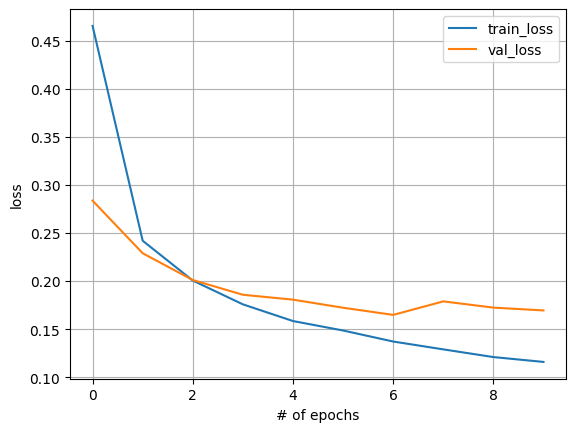

In [16]:
import matplotlib.pyplot as plt

plt.plot(df.loss, label='train_loss')
plt.plot(df.val_loss, label='val_loss') # val_loss가 5정도 부터 올라가는 것을 확인 가능, 과적합이 일어난다고 판단 가능
plt.xlabel("# of epochs")
plt.ylabel("loss")
plt.legend()
plt.grid();

* 모델 학습 결과 시각화

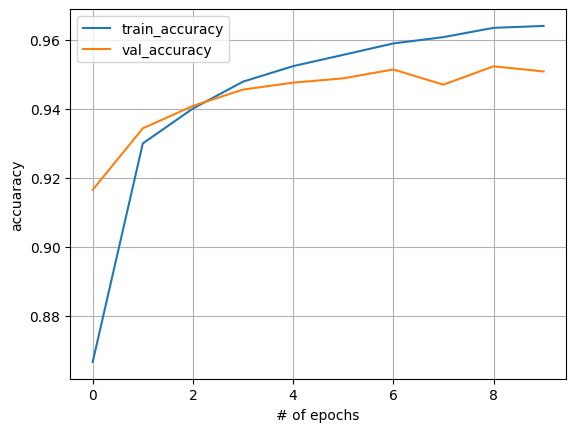

In [17]:
plt.plot(df.accuracy, label='train_accuracy')
plt.plot(df.val_accuracy, label='val_accuracy') 
plt.xlabel("# of epochs")
plt.ylabel("accuaracy")
plt.legend()
plt.grid();

In [18]:
# 모델 성능 검증

model.evaluate(X_val, y_val_encoded)

375/375 [==============================] - 0s 1ms/step - loss: 0.1695 - accuracy: 0.9508


[0.16947977244853973, 0.9508333206176758]

In [ ]:
# 모델 예측
np.set_printoptions(suppress=True)
y_pred_proba = model.predict(X_val)[:10]

375/375 [==============================] - 0s 982us/step


In [ ]:
# 클래스 이름을 찾는 법
np.argmax(y_pred_proba, axis=-1)

array([7, 7, 3, 5, 6, 9, 6, 6, 7, 8], dtype=int64)

In [ ]:
y_val_encoded[:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [19]:
submission = pd.read_csv('./data/skyggle_MNIST/submission.csv')
submission

,no,label
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
...,...,...
9995,9996,NaN
9996,9997,NaN
9997,9998,NaN
9998,9999,NaN


In [ ]:
################################################################

In [20]:
y_v2 = model.predict(X_test_np)
answer = np.argmax(y_v2, axis=-1)

313/313 [==============================] - 0s 796us/step


In [21]:
submission['label'] = answer

In [23]:
submission.to_csv('submission.csv', index=False)

In [22]:
submission

,no,label
0,1,7
1,2,2
2,3,1
3,4,0
4,5,4
...,...,...
9995,9996,2
9996,9997,3
9997,9998,4
9998,9999,5
